# Neuroinformatics: Using Python for literature searches
### MAY 24, 2022
### Guest lecture by Monique Surles-Zeigler

In this notebook, you will learn to:
* Identify the conceptual and technical tools used to conduct informatics research (e.g. APIs, ontologies, bioentrez, BLAST)
* Identify the structure and use of json format
* Define MESH terms & describe their role in informatics research
* Explain the role and importance of informatics research
* Conduct a pubmed search using bioentrez

## Setup
We'll need many new packages that aren't in our DataHub for today's lab. To get everything setup, run our setup script below.

In [6]:
# Install packages that do not exist in DataHub
! pip install xmljson
! pip install xmltodict
! pip install Biopython

# Import many packages!
%run informatics_module/informatics_setup.py

Since we just did several things behind the scenes, let's take a look at the packages we imported.

In [7]:
%whos

Variable            Type        Data/Info
-----------------------------------------
Entrez              module      <module 'Bio.Entrez' from<...>/Bio/Entrez/__init__.py'>
Tree                type        <class 'nltk.tree.Tree'>
getopt              module      <module 'getopt' from '/U<...>lib/python3.7/getopt.py'>
informatics_setup   module      <module 'informatics_modu<...>le/informatics_setup.py'>
json                module      <module 'json' from '/Use<...>hon3.7/json/__init__.py'>
nltk                module      <module 'nltk' from '/Use<...>ckages/nltk/__init__.py'>
pd                  module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
product             type        <class 'itertools.product'>
random              module      <module 'random' from '/U<...>lib/python3.7/random.py'>
requests            module      <module 'requests' from '<...>es/requests/__init__.py'>
sys                 module      <module 'sys' (built-in)>
urllib              module      <modu

## Accessing NCBI databases with Biopython
Biopython is a set of freely available tools for biological computation written in Python. It contains a collection of python modules to search to deal with DNA, RNA & protein sequence operations such as reverse complementing of a DNA string, finding motifs in protein sequences, etc.

Bio.Entrez is the module within the BioPython package that provides code to access NCBI over the World Wide Web to retrieve various sorts of information. This module provides a number of functions which will return the data as a handle object. This is the standard interface used in Python for reading data from a file and provides methods or offers iteration over the contents line by line.

### Bio.Entrez is not the only sub-module in Biopython. [Other packages include](https://biopython.org/docs/1.75/api/index.html):
- Bio.GEO - Access to data from the Gene Expression Omibus database.
- Bio.KEGG - Access to data from the KEGG database.
- Bio.motifs - Access to tools for sequence motif analysis.

### Best practice/required information: 
- Always provide your email with Entrez.email = "youremail.com"

### Functions used in Bio.entrez

Bio.Entrez has a ton of different functions. We'll use a few in our notebook today. Read more about these functions on [the website](https://www.ncbi.nlm.nih.gov/books/NBK25499/).

- **eInfo** - Provides the number of records indexed in each field of a given database, the date of the last update of the database, and the available links from the database to other Entrez databases.
- **eSearch** - Responds to a text query with the list of matching **Entrez Unique Identifier (UIDs)** in a given database (for later use in ESummary, EFetch or ELink), along with the term translations of the query.
- ePost - Accepts a list of UIDs from a given database, stores the set on the History Server, and responds with a query key and web environment for the uploaded dataset.
- efetch - Retrieves records in the requested format from a list of one or more primary IDs or from the user’s environment
- elink  - Checks for the existence of an external or Related Articles link from a list of one or more primary IDs. Retrieves primary IDs and relevancy scores for links to Entrez databases or Related Articles; creates a hyperlink to the primary LinkOut provider for a specific ID and database, or lists LinkOut URLs and Attributes for multiple IDs.
- eSummary - Retrieves document summaries from a list of primary IDs or from the user’s environment.
- egQuery - Provides Entrez database counts in XML for a single search using Global Query.
- eSpell - Retrieves spelling suggestions.
- eCitmatch - Retrieves PubMed IDs (PMIDs) that correspond to a set of input citation strings.
- **read** - Parses the XML results returned by any of the above functions.

<font color='red'>Can we highlight only the functions we're using here, or the most common ones? This is a long, intimidating list...</font>

<div class="alert alert-success">

**Task**: Write your email below.

</div>

In [ ]:
### provide your email as a string
Entrez.email = ...

As previously mentioned in the slides, the BioEntrez package provides access to multiple biomedical databases.

<div class="alert alert-success">

**Task**: How can you show the list of possible databases?

</div>


In [ ]:
### access API to search for a list of databases in Bio.Entrez
# declare a variable (e.g.handle) where the results will be stored 
# pass within the Entrez.einfo() function.

handle = Entrez.einfo()
record = Entrez.read(handle)
print (record)

Below, we'll look for information about PubMed by specifying the `db="pubmed"` argument in our call to `enifo`.

In [ ]:
# Look for info about a database - PubMed
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)
print(record)

<div class="alert alert-success">

**Task**: Pull out information from the dictionary about 
1. Paper counts
2. Field list 
3. How many MESH terms are associated with the papers?
4. That other information can you pull it?
5. Can you make the output more readable?
</div>

In [ ]:
# Pull out information from the dictionary here



### What are MESH terms?
- abbreviation for Medical Subject Headings
- Controlled vocabulary thesaurus produced by the National Library of Medicine (NLM) 
    - It consists of sets of terms naming descriptors in a hierarchical structure that permits searching at various levels of specificity.
    
*** Search for MESH terms - https://www.nlm.nih.gov/mesh/meshhome.html

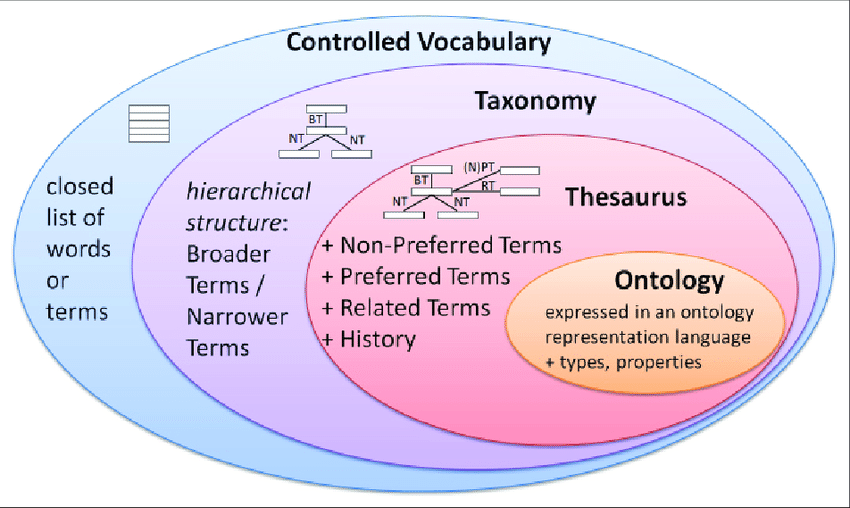
Kopácsi, S., Hudak, R., & Ganguly, R. (2017). Implementation of a classification server to support metadata organization for long term preservation systems. VOEB-Mitteilungen, 70(2), 225–243. https://doi.org/10.31263/voebm.v70i2.1897

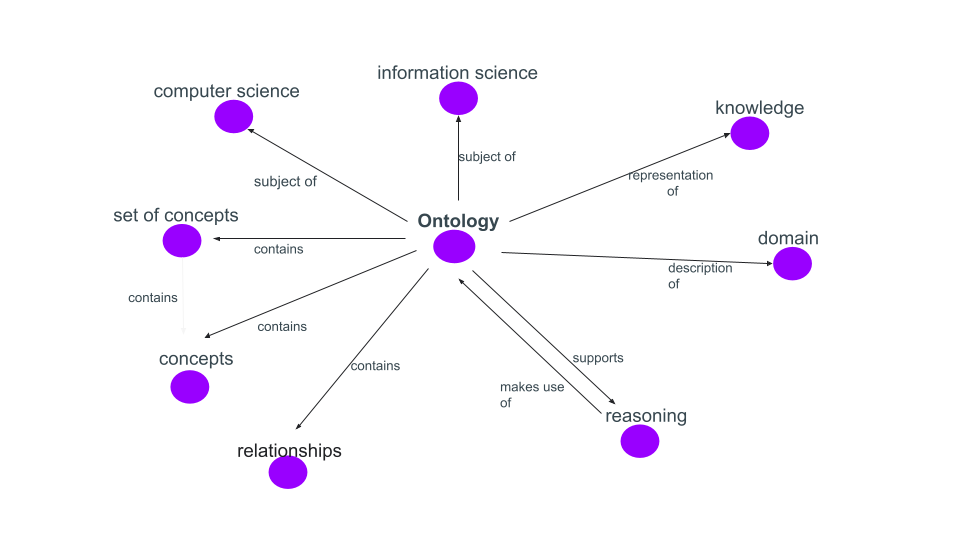

<div class="alert alert-success">

**Task #1**: Create a pubmed search using Bio.Entrez.
- Word search
- search by pmids

[This website may help!](https://biopython-tutorial.readthedocs.io/en/latest/notebooks/09%20-%20Accessing%20NCBIs%20Entrez%20databases.html)
    
**Task #2**: How does the search results differ from the PubMed user interface? 
</div>

In [ ]:
# Create your pubmed search here


Now let's do a complicated search using the same basic concepts.  
We will locate PubMed articles that may identify gene product in primary cell types in the hippocampus and then pull the text from articles that are accessible in PubMed Central.

In [ ]:
def comb_list(brain_region, cell_type, method):
    '''iterate over terms given - in this case brain region, cell type and method'''
    all_list = list(product(brain_region, method, cell_type))
    new_list = [list(i) for i in all_list]
    terms = [" AND ".join(i) for i in new_list]
    return terms

In [ ]:
brain_region = ["hippocampus"]

cell_type = ["CA1 pyramidal cell", "CA2 pyramidal cell", "CA3 pyramidal cell", "CA4 Pyramidal Cell", "Dentate Gyrus Granule Cell", "Dentate Gyrus Basket Cell", "CA1 Basket Cell"]

method = ["rna seq* ","microarray","in situ hybridization", "polymerase chain reaction"]

terms = comb_list(brain_region, cell_type, method)
terms


Below, we'll use a script (`informatics_functions.py`) to define two short functions and one very lengthy function in the file `informatics_functions.py`. Take a look at this function closely -- what is it doing?

In [8]:
%run informatics_module/informatics_functions.py

In [ ]:
#get all abstracts   
new_abstracts = {}
gene_abstracts = findformat_abstract(terms) 

#only get the abstracts with pmc ids
pmc_abstracts = {k: v for k, v in gene_abstracts.items() if len(v['PMC']) > 0} 

# This is a way to make a copy of dictionary, as a backup in case
#  Deepcopy () copies all the elements of an object as well as the memory location that contains data rather than containing the data itself.
gene_abstract_cp = deepcopy(gene_abstracts)
pmc_abstract_cp = deepcopy(pmc_abstracts)

In [ ]:
gene_abstracts

In [ ]:
print ('original count', len(gene_abstract))
print('PMC:', len(pmc_abstracts))
print('difference =', len(gene_abstracts)-len(pmc_abstracts))

<div class="alert alert-success">

The length of `pmc_abstracts` is less than that of `gene_abstract`. Why is that?

</div>

## Read results as a dataframe
It's difficult to visually parse dictionaries. Thankfully we have another tool at our disposal: pandas.

<div class="alert alert-success">
    
**Task**: Turn `gene_abstract` into a pandas dataframe called `gene_abstract_df`.
    
</div>

In [ ]:
# Turn gene_abstract into a df


Hmm, it would make a lot more sense if each paper had its own row -- that's how we typically conceptualize dataframes, with each row as a different observation, patient, cell, etc. We can **transpose** the dataframe using the [`transpose`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) (or `T` for short) method.

In [ ]:
#transposed data frame
papers_df = gene_abstract_df.T
papers_df

<div class="alert alert-success">

**Task**: Using the `iloc` method, view *just* the first abstract.
    
</div>

In [ ]:
# Look at the first abstract here


In [ ]:
#format the Methods and Results section 
g_updated_records = getTexts(gene_abstract)

In [ ]:
#make another copy of the file since a lot of information is in here.
pmc_papers = deepcopy(g_updated_records)
pmc_papers

## Save results as a json & excel file

Below, we'll save our findings as both a json and an Excel file.

**Json?**  
JavaScript Object Notation (JSON) is a standardized format commonly used to transfer data between systems and used by a lot of databases and APIs. 
Like Python dictionaries, it represents objects as name/value pairs.


In [ ]:
#save file as a json file
with open('g_updated_records.json', 'w') as outfile:        
    json.dump(g_updated_records, outfile)
    
#read in json file    
with open('g_updated_records.json', 'r') as newfile:
    g_updated_records = json.load(newfile)
    
#save file to an excel file - save file as pandas dataframe, save to excel
df_updated_records = dp = pd.DataFrame(gene_abstract).T
g_update_records.to_excel('g_updated_records.json.xlsx')
